#### Predicting House Prices with Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\guduru\Downloads\Housing.csv")

In [3]:
# Data Exploration
print("Dataset shape:", data.shape)
print("Columns:", data.columns)
print("First 5 rows:")
print(data.head())

Dataset shape: (545, 13)
Columns: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      y

In [4]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
# Summary statistics
print("Summary statistics:")
print(data.describe())

Summary statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


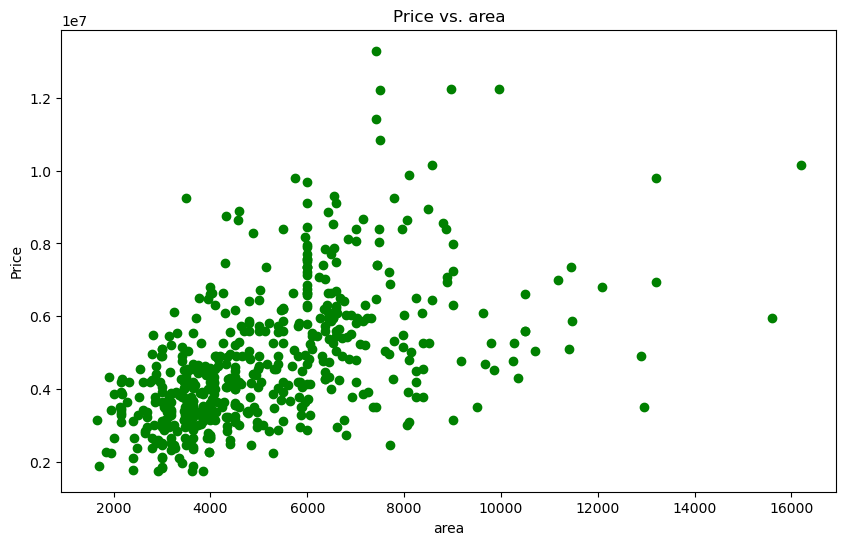

In [9]:
# Data Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['area'], data['price'], color='green')
plt.title('Price vs. area')
plt.xlabel('area')
plt.ylabel('Price')
plt.show()

In [10]:
# Feature Selection and Preprocessing
X = data[['area']]  # Feature(s)
y = data['price']  # Target variable


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Model Evaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [14]:
# Train set evaluation metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)


In [15]:
# Test set evaluation metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)


In [16]:
print("Train set RMSE:", train_rmse)
print("Train set R^2 score:", train_r2)
print("Test set RMSE:", test_rmse)
print("Test set R^2 score:", test_r2)


Train set RMSE: 1484836.2473280819
Train set R^2 score: 0.2849633094647923
Test set RMSE: 1917103.7021424233
Test set R^2 score: 0.27287851871974644


In [17]:
# Visualization of Predictions
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

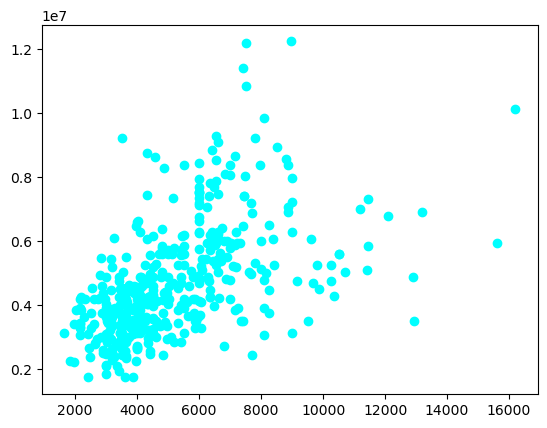

In [19]:
# Plotting training data
plt.scatter(X_train, y_train, color='cyan', label='Training data')

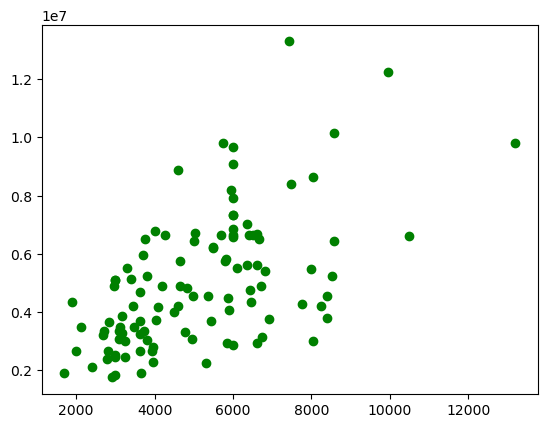

In [20]:
# Plotting test data
plt.scatter(X_test, y_test, color='green', label='Testing data')


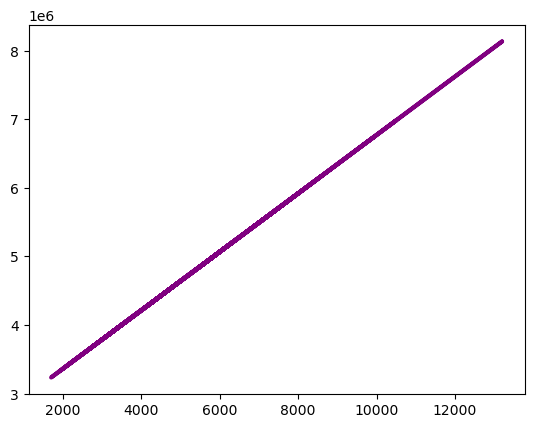

In [22]:
# Plotting predictions
plt.plot(X_test, y_pred_test, color='purple', linewidth=3, label='Predictions')

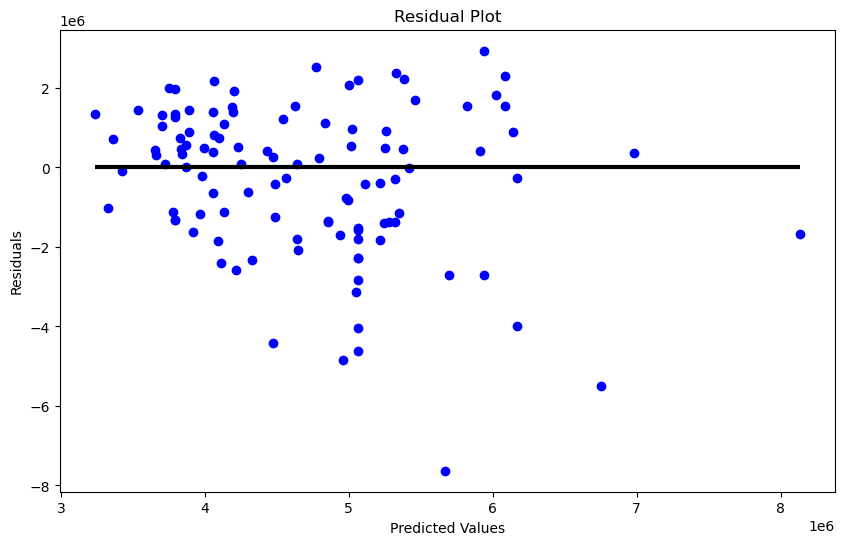

In [25]:
# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, y_pred_test - y_test, color='blue')
plt.hlines(y=0, xmin=min(y_pred_test), xmax=max(y_pred_test), color='black', lw=3)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [26]:
# Feature Importance
coef = model.coef_
intercept = model.intercept_
print("Coefficients:", coef)
print("Intercept:", intercept)


Coefficients: [425.72984194]
Intercept: 2512254.2639593435


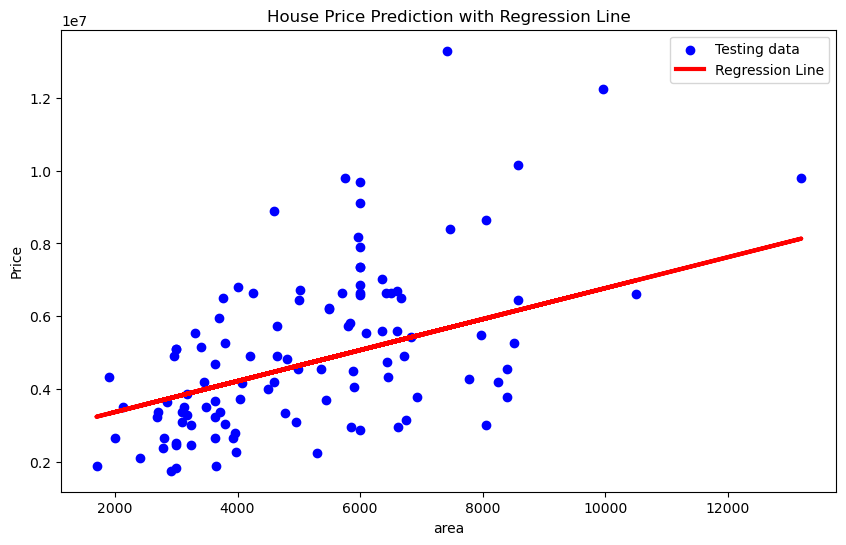

In [27]:

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Testing data')
plt.plot(X_test, coef * X_test + intercept, color='red', linewidth=3, label='Regression Line')
plt.title('House Price Prediction with Regression Line')
plt.xlabel('area')
plt.ylabel('Price')
plt.legend()
plt.show()


In [29]:
# Cross-validation
from sklearn.model_selection import cross_val_score

In [30]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-validation scores: [ -4.48747915  -8.93725564 -15.94730772 -35.66059689 -22.62706961]
Mean CV Score: -17.531941802207882


In [31]:
# Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - test_r2) * ((n - 1) / (n - p - 1))
print("Adjusted R^2:", adjusted_r2)


Adjusted R^2: 0.26608299085731424


In [32]:
# AIC and BIC
n = len(y_train)
k = X_train.shape[1]
aic = n * np.log(test_rmse**2) + 2 * k
bic = n * np.log(test_rmse**2) + k * np.log(n)
print("AIC:", aic)
print("BIC:", bic)


AIC: 12616.636373694597
BIC: 12620.714015937945
